<a href="https://colab.research.google.com/github/alachaudhary/AI_LAB/blob/main/F2021266434.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/archive.zip',
encoding = 'latin',header=None)

# Assign column names based on your structure
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

df.head()


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

subset_df = df.sample(n=100000, random_state=42)  # taking subset of data
X = subset_df.drop('sentiment', axis=1)
y = subset_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now X_train and X_test are scaled and ready for model training


#Classification Model

In [3]:
def evaluate_classification_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}


In [4]:
# Initializing models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluating models
classification_results = {}
for model_name, model in classification_models.items():
    classification_results[model_name] = evaluate_classification_model(model, X_train, X_test, y_train, y_test)

classification_results


{'Logistic Regression': {'accuracy': 0.6233,
  'precision': 0.6233743651540985,
  'recall': 0.6233,
  'f1_score': 0.6232488902357751},
 'Decision Tree Classifier': {'accuracy': 0.6504,
  'precision': 0.6504081434592139,
  'recall': 0.6504,
  'f1_score': 0.6503965529150101},
 'Random Forest Classifier': {'accuracy': 0.67905,
  'precision': 0.6851063952499408,
  'recall': 0.67905,
  'f1_score': 0.6763758535184945},
 'Support Vector Classifier': {'accuracy': 0.6697,
  'precision': 0.749203671845339,
  'recall': 0.6697,
  'f1_score': 0.6409943325495618},
 'K-Nearest Neighbors Classifier': {'accuracy': 0.6451,
  'precision': 0.6468317274884515,
  'recall': 0.6451,
  'f1_score': 0.6440290461193087},
 'Naive Bayes': {'accuracy': 0.63605,
  'precision': 0.6379201275228099,
  'recall': 0.63605,
  'f1_score': 0.6347872844930169}}

#Regression model

In [6]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    return {'mse': mse, 'rmse': rmse, 'mae': mae}


In [7]:
# Initializing models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Evaluating models
regression_results = {}
for model_name, model in regression_models.items():
    regression_results[model_name] = evaluate_regression_model(model, X_train, X_test, y_train, y_test)

regression_results


{'Linear Regression': {'mse': 3.6335648802909426,
  'rmse': 1.906191197202144,
  'mae': 1.813746476066347},
 'Decision Tree Regressor': {'mse': 5.5978,
  'rmse': 2.365967032737354,
  'mae': 1.3995},
 'Random Forest Regressor': {'mse': 3.103516061191383,
  'rmse': 1.761679897481771,
  'mae': 1.437358080952381},
 'Support Vector Regressor': {'mse': 4.465643350898937,
  'rmse': 2.1132068878599974,
  'mae': 1.3822988256101376},
 'K-Nearest Neighbors Regressor': {'mse': 3.6471360000000006,
  'rmse': 1.9097476273057654,
  'mae': 1.52868}}

#Result

In [16]:
# Combine classification and regression results
all_results = {
    'Classification Models': classification_results,
    'Regression Models': regression_results
}

for model_type, results in all_results.items():
    print(f"Results for {model_type}:")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
        print("\n")


Results for Classification Models:

Logistic Regression:
accuracy: 0.6233
precision: 0.6233743651540985
recall: 0.6233
f1_score: 0.6232488902357751



Decision Tree Classifier:
accuracy: 0.6504
precision: 0.6504081434592139
recall: 0.6504
f1_score: 0.6503965529150101



Random Forest Classifier:
accuracy: 0.67905
precision: 0.6851063952499408
recall: 0.67905
f1_score: 0.6763758535184945



Support Vector Classifier:
accuracy: 0.6697
precision: 0.749203671845339
recall: 0.6697
f1_score: 0.6409943325495618



K-Nearest Neighbors Classifier:
accuracy: 0.6451
precision: 0.6468317274884515
recall: 0.6451
f1_score: 0.6440290461193087



Naive Bayes:
accuracy: 0.63605
precision: 0.6379201275228099
recall: 0.63605
f1_score: 0.6347872844930169


Results for Regression Models:

Linear Regression:
mse: 3.6335648802909426
rmse: 1.906191197202144
mae: 1.813746476066347



Decision Tree Regressor:
mse: 5.5978
rmse: 2.365967032737354
mae: 1.3995



Random Forest Regressor:
mse: 3.103516061191383
rmse

Metric: mse, Values: [3.6335648802909426, 5.5978, 3.103516061191383, 4.465643350898937, 3.6471360000000006]
Metric: rmse, Values: [1.906191197202144, 2.365967032737354, 1.761679897481771, 2.1132068878599974, 1.9097476273057654]
Metric: mae, Values: [1.813746476066347, 1.3995, 1.437358080952381, 1.3822988256101376, 1.52868]


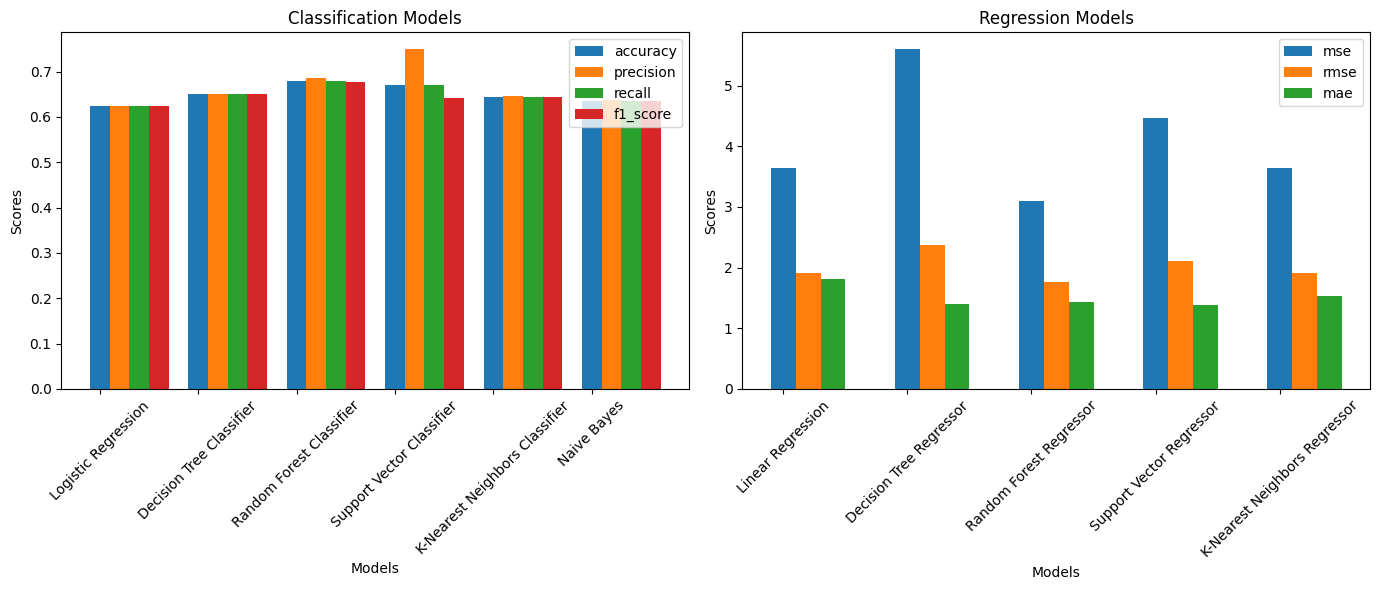

In [14]:
import matplotlib.pyplot as plt
def plot_results(all_results):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot classification results
    class_results = all_results['Classification Models']
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    for i, metric in enumerate(metrics):
        ax = axes[0]
        model_names = list(class_results.keys())
        values = [class_results[model][metric] for model in model_names]
        ax.bar(np.arange(len(model_names)) + i * 0.2, values, width=0.2, label=metric)

    ax.set_title('Classification Models')
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45)
    ax.legend()

    # Plot regression results
    reg_results = all_results['Regression Models']
    metrics = ['mse', 'rmse', 'mae']
    for i, metric in enumerate(metrics):
        ax = axes[1]
        model_names = list(reg_results.keys())
        values = [reg_results[model].get(metric, 0) for model in model_names]
        print(f"Metric: {metric}, Values: {values}")  # Debug print statement
        ax.bar(np.arange(len(model_names)) + i * 0.2, values, width=0.2, label=metric)

    ax.set_title('Regression Models')
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(all_results)

In [15]:
# identify best model based on F1 score for classification and RMSE for regression
best_classification_model = max(classification_results, key=lambda x: classification_results[x]['f1_score'])
best_regression_model = min(regression_results, key=lambda x: regression_results[x]['rmse'])

print(f"Best Classification Model: {best_classification_model} with F1 Score: {classification_results[best_classification_model]['f1_score']}")
print(f"Best Regression Model: {best_regression_model} with RMSE: {regression_results[best_regression_model]['rmse']}")

Best Classification Model: Random Forest Classifier with F1 Score: 0.6763758535184945
Best Regression Model: Random Forest Regressor with RMSE: 1.761679897481771
